### 예제 : 경사 하강법
#### 공부한 시간과 성적 사이 관계 분석하기 (3)

##### 1. 단일 선형 회귀

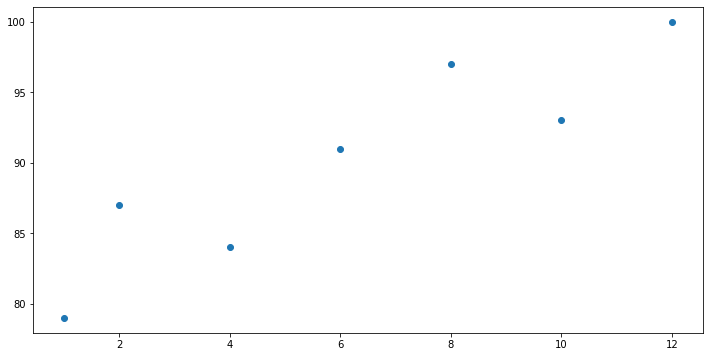

In [12]:
import numpy as np
import matplotlib.pyplot as plt

time = [1, 2, 4, 6, 8, 10, 12]
score = [79, 87, 84, 91, 97, 93, 100]

time_data = np.array(time)
score_data = np.array(score)

plt.figure(figsize=(12, 6))
plt.scatter(time, score)
plt.show()

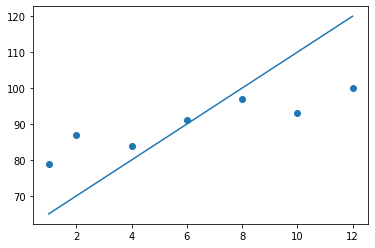

In [13]:
# 초기 설정
a = 5
b = 60

predict = [a * t + b for t in time]

plt.scatter(time, score)
plt.plot([min(time), max(time)], [min(predict), max(predict)])
plt.show()

$$MSE=\frac {1}{n}\sum \left( \widehat {y}_{i}-y_{i}\right) ^{2}$$
<br>
$$\frac {\partial }{\partial a}nSE=\frac {2}{n}\sum \left( \widehat {y}_{i}-y_{i}\right) x_{i}$$
<br>
$$\frac {\partial }{\partial b}nSE=\frac {2}{n}\sum \left( \widehat {y}_{i}-y_{i}\right)$$

In [14]:
learning_rate = 0.05

for i in range(1001):
    score_predict = a * time_data + b
    error = score_data - score_predict
    
    a_diff = -(1 / len(time_data)) * sum(time_data * error)
    b_diff = -(1 / len(time_data)) * sum(error)
    
    # 미분값을 뺴는 이유는 미분값과 실제 정답과 부호가 반대로 되어있음으로
    a = a - learning_rate * a_diff
    b = b - learning_rate * b_diff
    
    if i % 100 == 0:
        print("epoch : {}, a : {}, b : {}".format(i, a, b))

epoch : 0, a : 2.4, b : 59.97142857142857
epoch : 100, a : -6.032528979923487e+21, b : -7.144153083686891e+20
epoch : 200, a : -2.2799075596694777e+43, b : -2.7000299007499074e+42
epoch : 300, a : -8.616582693489114e+64, b : -1.0204374653715154e+64
epoch : 400, a : -3.256513493226881e+86, b : -3.8565966267434086e+85
epoch : 500, a : -1.2307524350206713e+108, b : -1.4575452240959817e+107
epoch : 600, a : -4.651451804083714e+129, b : -5.508582529874078e+128
epoch : 700, a : -1.757949305649781e+151, b : -2.0818895350059968e+150
epoch : 800, a : -6.643916547778397e+172, b : -7.868202051003066e+171
epoch : 900, a : -2.5109726971067478e+194, b : -2.9736737936593046e+193
epoch : 1000, a : -9.489860145404452e+215, b : -1.1238572387663598e+215


### 왜 되지 않을까???

##### 2. 다중 선형 회귀

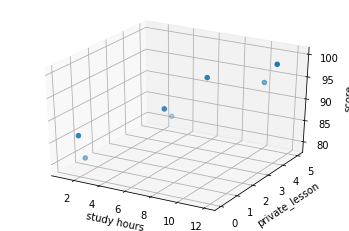

In [18]:
from mpl_toolkits import mplot3d

# time과 score는 동일하게 사용
lesson = [1, 0, 4, 2, 3, 5, 4]
ax = plt.axes(projection='3d')
ax.set_xlabel('study hours')
ax.set_ylabel('private_lesson')
ax.set_zlabel('score')
ax.dist = 10
ax.scatter(time, lesson, score)

In [20]:
lesson_data = np.array(lesson)

# 기울기, 절편 초기화
a1 = 0
a2 = 0
b = 0

for i in range(1001):
    score_predict = a1 * time_data + a2 * lesson_data + b
    error = score_data - score_predict
    a1_diff = - (1 / len(time_data)) * sum(time_data * error)
    a2_diff = - (1 / len(lesson_data)) * sum(lesson_data * error)
    b_diff = - (1 / len(time_data)) * sum(error)
    a1 = a1 - learning_rate * a1_diff
    a2 = a2 - learning_rate * a2_diff
    b = b - learning_rate * b_diff
    
    if i % 100 == 0:
        print("epoch = {}, a1 : {}, a2 : {}, b : {}".format(i, a1, a2, b))

epoch = 0, a1 : 28.864285714285714, a2 : 12.521428571428572, b : 4.507142857142857
epoch = 100, a1 : 3.187597873517071e+33, a2 : 1.3462376099276595e+33, b : 3.809805938853708e+32
epoch = 200, a1 : 5.157101403437137e+65, a2 : 2.1780300222930885e+65, b : 6.163749736853489e+64
epoch = 300, a1 : 8.343491224628247e+97, a2 : 3.523757428129611e+97, b : 9.972111815751048e+96
epoch = 400, a1 : 1.349863816310685e+130, a2 : 5.700962009341714e+129, b : 1.6133525582854978e+129
epoch = 500, a1 : 2.1838967328284472e+162, a2 : 9.223383985658964e+161, b : 2.610185811610176e+161
epoch = 600, a1 : 3.533248970769538e+194, a2 : 1.4922185414937264e+194, b : 4.222926933200079e+193
epoch = 700, a1 : 5.716318039120685e+226, a2 : 2.4142073874836847e+226, b : 6.832123523093429e+225
epoch = 800, a1 : 9.248227960923945e+258, a2 : 3.905860400277911e+258, b : 1.1053450029606524e+258
epoch = 900, a1 : 1.496237960027366e+291, a2 : 6.319152838961419e+290, b : 1.7882984279196557e+290
epoch = 1000, a1 : nan, a2 : nan, b 

/Users/cos/anaconda3/envs/deep/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/Users/cos/anaconda3/envs/deep/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':
/Users/cos/anaconda3/envs/deep/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


### 왜 되지 않을까???